In [15]:
import pandas as pd #import pandas in to our code so we can use it
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
csv_path = '2019.csv' #our file path is just our file name

df = pd.read_csv(csv_path) #load our CSV in to a DataFrame using read_csv

df.head() # view the first 5 rows of our DataFrame


,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [6]:
print('There are', df.shape[0], 'players we can analyze for the 2019 season in this dataset')
print('There are', df.shape[1], 'columns of data we can analyze for the 2019 season')



There are 620 players we can analyze for the 2019 season in this dataset
There are 28 columns of data we can analyze for the 2019 season


In [7]:
df_rb = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'FantasyPoints']]
df_rb['Usage'] = df['Tgt'] + df['RushingAtt']
df_rb

,Player,Tgt,RushingAtt,FantasyPoints,Usage
0,Christian McCaffrey,142.0,287.0,469.2,429.0
2,Derrick Henry,24.0,303.0,294.6,327.0
3,Aaron Jones,68.0,236.0,314.8,304.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0
5,Dalvin Cook,63.0,250.0,292.4,313.0
...,...,...,...,...,...
535,Dexter Williams,0.0,5.0,1.1,5.0
550,James Develin,0.0,2.0,0.3,2.0
583,Alfred Morris,0.0,1.0,0.4,1.0
586,Roosevelt Nix,3.0,0.0,2.4,3.0


In [8]:
df_rb['UsageRank'] = df_rb['Usage'].rank(ascending=False)

df_rb['FantasyPointsRank'] = df_rb['FantasyPoints'].rank(ascending=False)

df_rb.sort_values(by='UsageRank').head(15)

,Player,Tgt,RushingAtt,FantasyPoints,Usage,UsageRank,FantasyPointsRank
0,Christian McCaffrey,142.0,287.0,469.2,429.0,1.0,1.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0,2.0,3.0
28,Leonard Fournette,100.0,265.0,259.4,365.0,3.0,7.0
8,Nick Chubb,49.0,298.0,255.2,347.0,4.0,8.0
2,Derrick Henry,24.0,303.0,294.6,327.0,5.0,5.0
17,Chris Carson,47.0,278.0,232.6,325.0,6.0,12.0
62,Le'Veon Bell,78.0,245.0,213.0,323.0,7.5,16.0
22,Joe Mixon,45.0,278.0,225.4,323.0,7.5,13.0
5,Dalvin Cook,63.0,250.0,292.4,313.0,9.0,6.0
3,Aaron Jones,68.0,236.0,314.8,304.0,10.0,2.0


<AxesSubplot:xlabel='Usage', ylabel='FantasyPoints'>

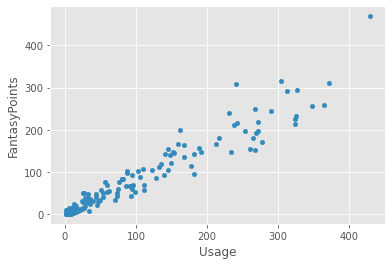

In [9]:

#decare style of plot (similar to R)
plt.style.use('ggplot')

df_rb.plot(x='Usage', y='FantasyPoints', kind='scatter')


In [12]:

#define x and y variables to look for correlation
x = df_rb['Usage'].values
y = df_rb['FantasyPoints'].values
#covariance definition in order to find correlation
def covariance(x, y):
    n = len(x)
    return sum((x - np.mean(x)) * (y - np.mean(y))) * 1/(n-1)
#covariance(x,y)
#correlation coefficient equation definition
def corr(x, y):
    return covariance(x, y)/(np.std(x) * np.std(y))
corr(x,y)


0.967330979222704

In [14]:

X = df_rb['Usage'].values
Y = df_rb['FantasyPoints'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train[:20]

array([149.,  11., 141.,  22., 313.,  44., 267.,  32.,  98.,  71.,   5.,
         6.,   8.,  36.,   2.,  60., 135.,  94.,  57., 145.])